This tutorial shows the use of Google Colab for creating face detection system. It has two parts - 1. How to read and display image from a location? 2. How to run webcam of your PC by using Google Colab? In this tutorial, we have used Haar Cascade Classifier. It is based on Haar Wavelet Technique. You can refer https://medium.com/@krsatyam1996/haar-cascade-face-identification-aa4b8bc79478



In [2]:
!pip install opencv-python


Resized Image:  (600, 550, 3)


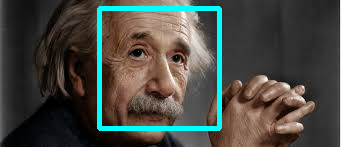

In [10]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread("/content/sample_data/einstein.jpg",1)
face_cascade = cv2.CascadeClassifier("/content/sample_data/haarcascade_frontalface_default.xml")
resize_img = cv2.resize(img,(550,600))
print("Resized Image: ", resize_img.shape)
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ei_face = face_cascade.detectMultiScale(gray_img,scaleFactor=1.05,minNeighbors=5)
for x,y,w,h in ei_face:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),3)
cv2_imshow(img)  


2. How to run webcam of your PC by usign Google Colab?

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


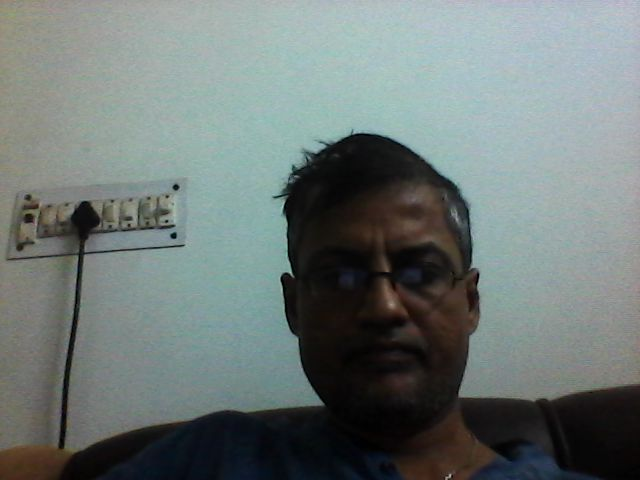

In [12]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

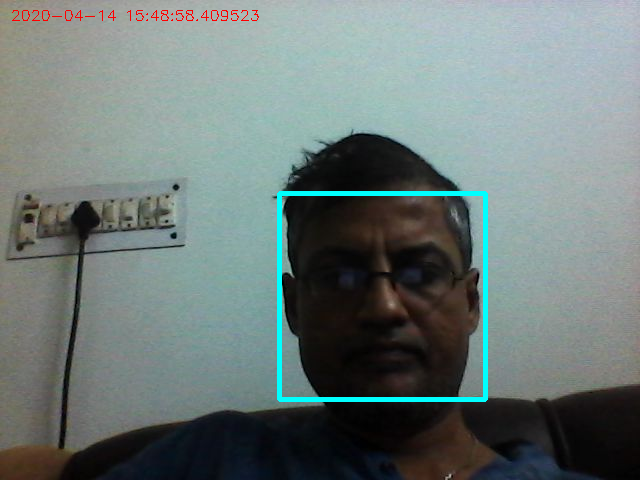

In [15]:
img = cv2.imread('photo.jpg', cv2.IMREAD_UNCHANGED)
face_cascade = cv2.CascadeClassifier("/content/sample_data/haarcascade_frontalface_default.xml")
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
my_face = face_cascade.detectMultiScale(gray_img,scaleFactor=1.05,minNeighbors=5)
for x,y,w,h in my_face:
  img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),3)
import datetime
font = cv2.FONT_HERSHEY_SIMPLEX 
img=cv2.putText(img,str(datetime.datetime.now()),(10,20),font,0.5,(0,0,255))
cv2_imshow(img)


API function is Retrived from https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb#scrollTo=buJCl90WhNfq